"""Regression Dataset:

Description: The Garment Industry is one of the key examples of the industrial globalization of this modern era. 
It is a highly labour-intensive industry with lots of manual processes. 
Satisfying the huge global demand for garment products is mostly dependent on the production and 
delivery performance of the employees in the garment manufacturing companies. 
So, it is highly desirable among the decision makers in the garments industry to track, 
analyse and predict the productivity performance of the working teams in their factories.
This dataset is to be used for regression purpose by predicting the productivity range (0-1).

#Attributes: 

01 date : Date in MM-DD-YYYY 
02 day : Day of the Week 
03 quarter : A portion of the month. A month was divided into four quarters 
04 department : Associated department with the instance
05 team_no : Associated team number with the instance 
06 no_of_workers : Number of workers in each team 
07 no_of_style_change : Number of changes in the style of a particular product 
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day. 
09 smv : Standard Minute Value, it is the allocated time for a task 
10 wip : Work in progress. Includes the number of unfinished items for products 
11 over_time : Represents the amount of overtime by each team in minutes 
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action. 
13 idle_time : The amount of time when the production was interrupted due to several reasons 
14 idle_men : The number of workers who were idle due to production interruption 
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

"""

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Tavleen Bajwa\Downloads\garments_worker_productivity.csv")

In [2]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [3]:
df.shape

(1197, 15)

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [6]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

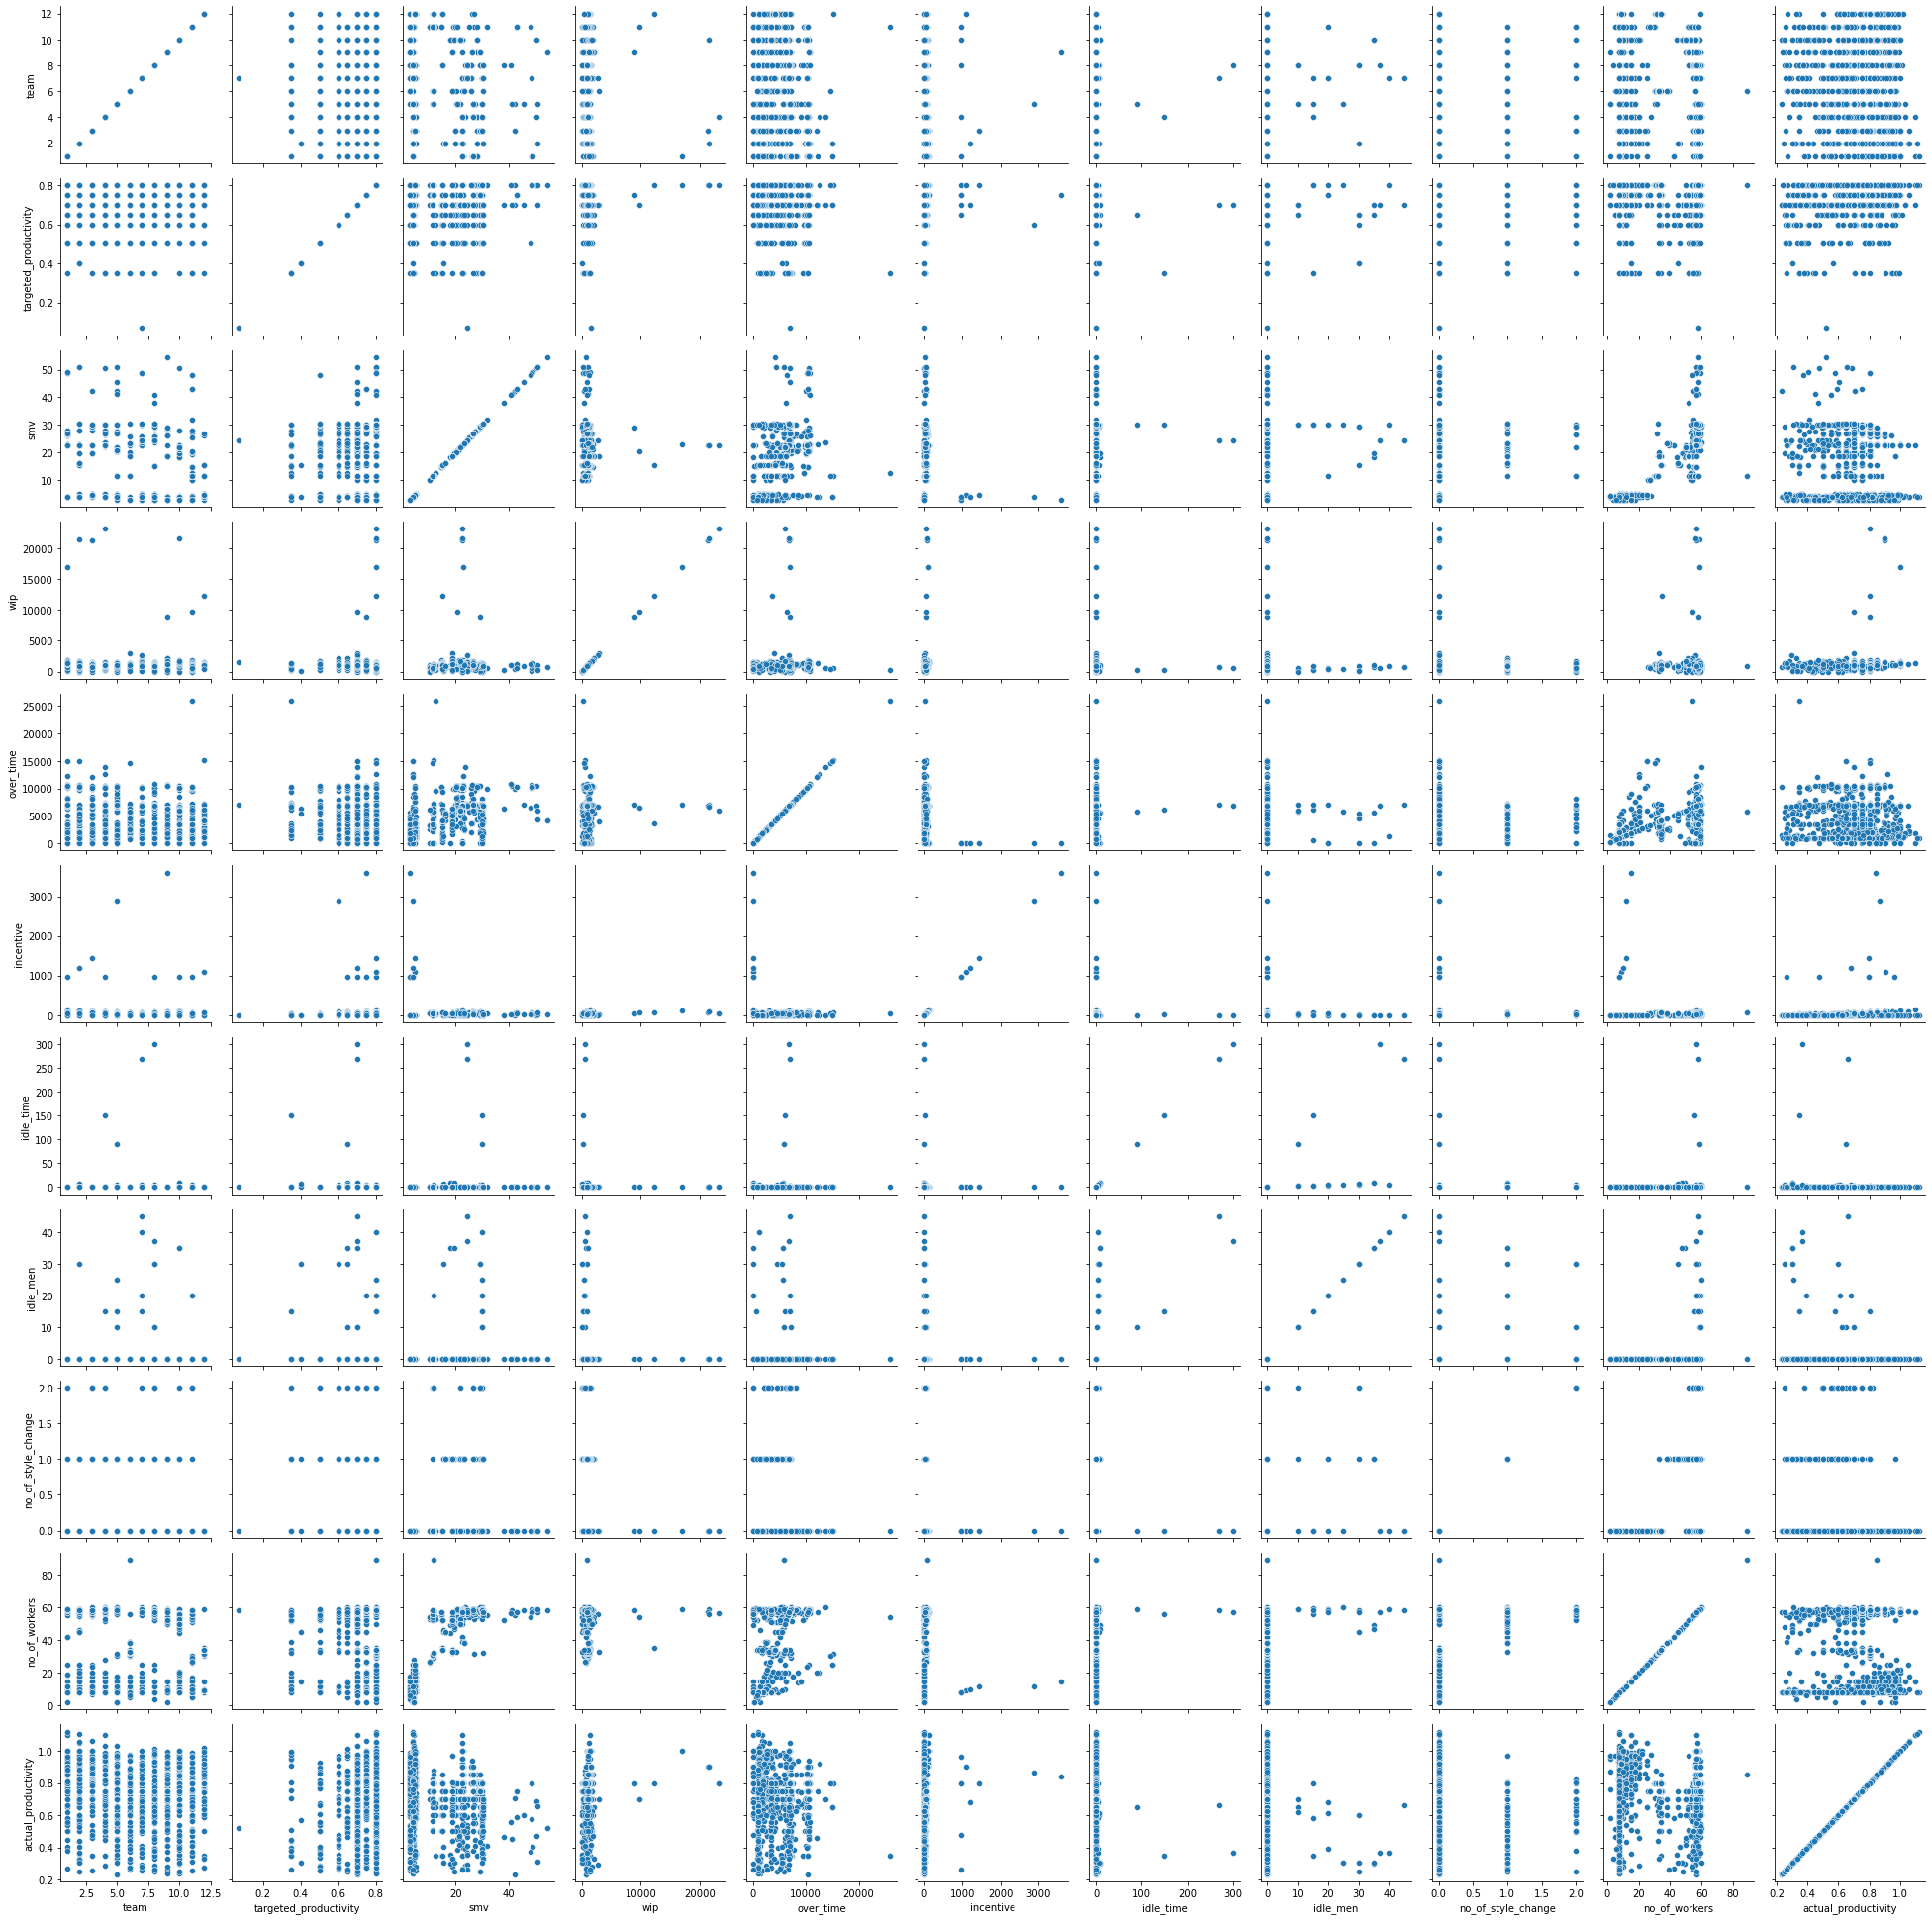

In [7]:
import seaborn as sns
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [8]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
df["wip"].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

In [10]:
#Wip tells the work in progress, if it is Nan then we can assume that no progress has been there, so we can impute 0 inplace of Nan values

In [11]:
df["wip"].fillna(0, inplace=True)

In [12]:
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [13]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [14]:
df.duplicated().sum()

0

In [15]:
cat_features=[feature for feature in df.columns if df[feature].dtypes=='object']

In [16]:
cat_features

['date', 'quarter', 'department', 'day']

# 1. Date and day column 

In [17]:
df["date"].value_counts()

3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: date, dtype: int64

In [18]:
df["date"].nunique()

59

In [19]:
df["day"].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

<AxesSubplot:>

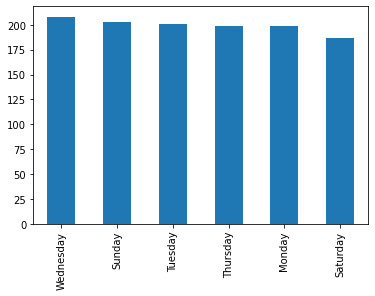

In [20]:
df["day"].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='day', ylabel='actual_productivity'>

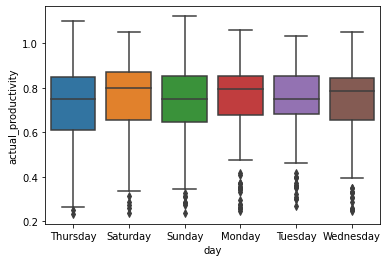

In [21]:
sns.boxplot(x="day", y = "actual_productivity", data=df)

In [22]:
#Date and day has no much of a significance with actual_productivity, so can be removed 

df.drop(axis="columns", labels="date" , inplace=True)
df.drop(axis="columns", labels="day" , inplace=True)

# 2. Quarter

In [23]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [24]:
#Only 4 quarters have been mentioned in the main quetion, also quarter5 has very low number comparitively, so we will remove it

index_names = df[df["quarter"] == "Quarter5"].index

In [25]:
df.drop(index_names, inplace=True)

In [26]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Name: quarter, dtype: int64

<AxesSubplot:>

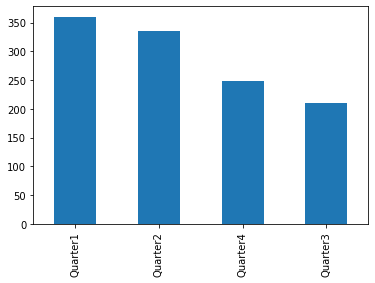

In [27]:
df["quarter"].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='quarter', ylabel='actual_productivity'>

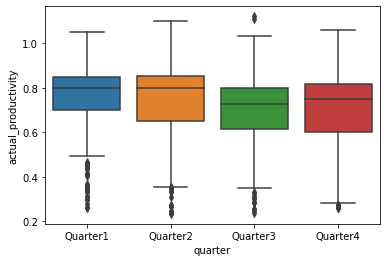

In [28]:
sns.boxplot(x="quarter", y = "actual_productivity", data=df)

In [29]:
#Different quarters show minute differences in actual_productivity. All 4 lie in the range 0.6 to 0.9
#Which concludes that this feature can be dropped from our dataset.

df.drop(axis="columns", labels="quarter" , inplace=True)

# 3. Department

In [30]:
df["department"].value_counts()

sweing        668
finishing     249
finishing     236
Name: department, dtype: int64

<AxesSubplot:>

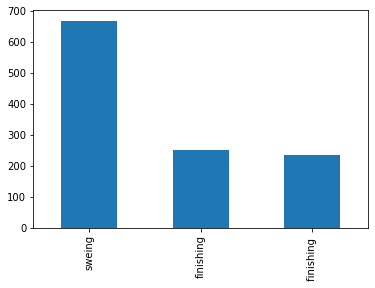

In [31]:
df["department"].value_counts().plot(kind = "bar")


#finishing is appearing as 2 seperate columns so will try to replace it using 0 and 1

In [32]:
df = df.replace(to_replace ='finishing', value = 1 , regex = True)

In [33]:
df["department"].value_counts()

sweing    668
1         485
Name: department, dtype: int64

In [34]:
df3 = df.replace(to_replace ='sweing', value = 0, regex = True)

<AxesSubplot:>

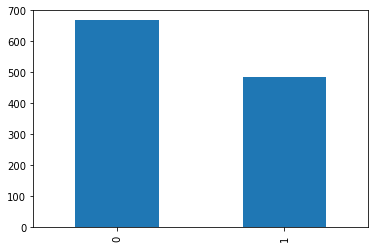

In [35]:
df3["department"].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='department', ylabel='actual_productivity'>

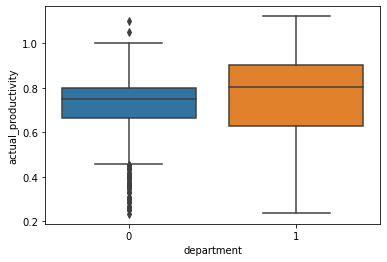

In [36]:
sns.boxplot(x="department", y = "actual_productivity", data=df3)

In [37]:
#In case of "department", no significance difference, mostly ranges between 0.6 - 0.9 roughly, so can be dropped 

df3.drop(axis="columns", labels="department" , inplace=True)

In [38]:
df

,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,sweing,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,sweing,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,sweing,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,sweing,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


# 4. Teams 

In [39]:
df3["team"].value_counts()

8     106
2     105
1     101
9     101
4     101
10     96
12     95
7      93
3      91
6      90
5      90
11     84
Name: team, dtype: int64

In [40]:
df3["team"].nunique()

12

<AxesSubplot:>

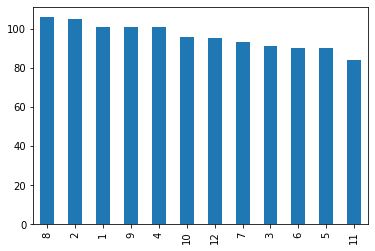

In [41]:
df3["team"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='team', ylabel='actual_productivity'>

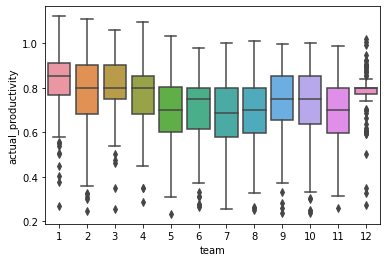

In [42]:
sns.boxplot(x="team", y = "actual_productivity", data=df3)

In [43]:
#Different teams show different range of actual_productivity but as it is a discrete variable, so we cant use it in linear regression model 

In [44]:
df3.drop(axis="columns", labels="team" , inplace=True)

# 5. Targeted_productivity 

In [45]:
df3["targeted_productivity"].value_counts()

0.80    524
0.70    237
0.75    206
0.65     57
0.60     53
0.50     46
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

<AxesSubplot:>

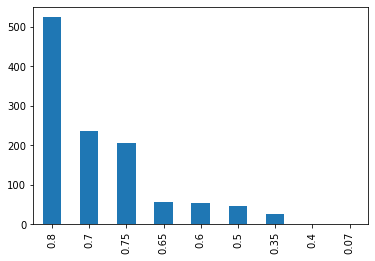

In [46]:
df3["targeted_productivity"].value_counts().plot(kind="bar")

<AxesSubplot:>

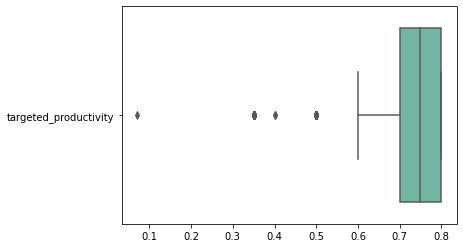

In [47]:
#Before outlier removal 

a=df[['targeted_productivity']]
sns.boxplot(data=a, orient="h", palette="Set2")

<AxesSubplot:xlabel='targeted_productivity', ylabel='actual_productivity'>

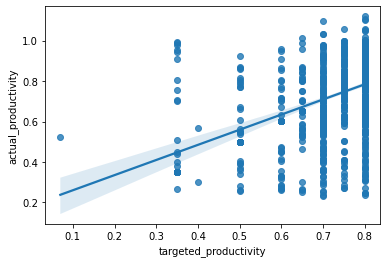

In [48]:
sns.regplot(x="targeted_productivity", y="actual_productivity", data=df3)

In [49]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

In [50]:
tar_prod = df3["targeted_productivity"]

In [51]:
tar_prod_outlier_remover = OutlierRemoval(tar_prod.quantile(0.25), tar_prod.quantile(0.75))

In [52]:
outlier_removed_tar_prod = tar_prod.apply(tar_prod_outlier_remover.removeOutlier)

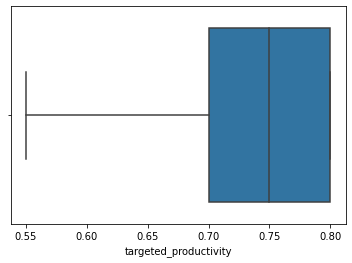

In [53]:
#Post outlier removal

sns.boxplot(x=outlier_removed_tar_prod)
plt.show()

In [54]:
#Making a new column in the datframe and assigning the values post outlier removal
df3["target_prod"] = outlier_removed_tar_prod

In [55]:
df3

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target_prod
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.80
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,0.75
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.80
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.80
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.80
...,...,...,...,...,...,...,...,...,...,...,...
1192,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,0.75
1193,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,0.70
1194,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,0.65
1195,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,0.75


<AxesSubplot:>

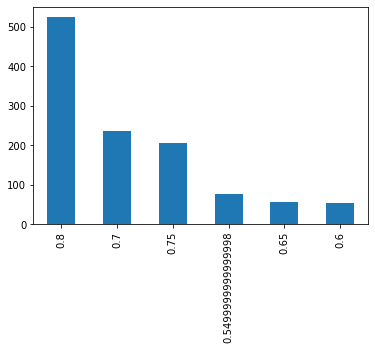

In [56]:
df3["target_prod"].value_counts().plot(kind = "bar")

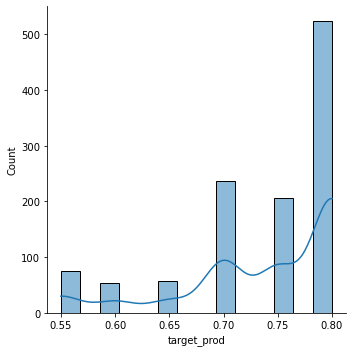

In [57]:
sns.displot(df3["target_prod"],kde=True )
plt.show()

<AxesSubplot:xlabel='target_prod', ylabel='actual_productivity'>

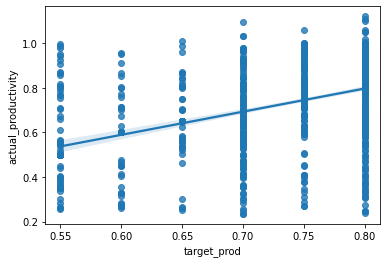

In [58]:
sns.regplot(x=df3["target_prod"], y=df3["actual_productivity"])

In [59]:
#Dropping the old targeted_productivity column 
df3.drop(axis="columns", labels="targeted_productivity" , inplace=True)

# 6. smv 

In [60]:
#Standard Minute Value, it is the allocated time for a task

df3["smv"].value_counts()

3.94     177
2.90     106
22.52     95
30.10     79
4.15      75
        ... 
40.99      1
48.68      1
41.19      1
49.10      1
54.56      1
Name: smv, Length: 69, dtype: int64

<AxesSubplot:>

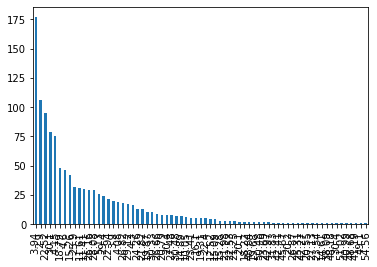

In [61]:
df3["smv"].value_counts().plot(kind="bar")

<AxesSubplot:>

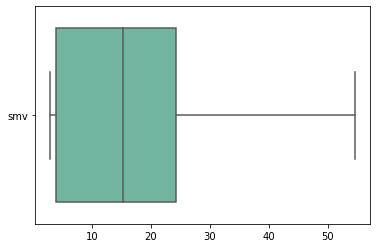

In [62]:
a=df3[['smv']]
sns.boxplot(data=a, orient="h", palette="Set2")

#No ouliers are present

<AxesSubplot:xlabel='smv', ylabel='actual_productivity'>

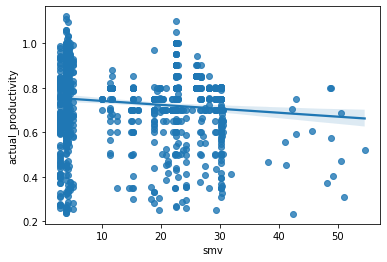

In [63]:
sns.regplot(x=df3["smv"], y=df3["actual_productivity"])

In [64]:
#As we see that there is slight negative correlation of smv and actual_productivity and data is also skewed

In [65]:
#We will perform log transformation inorder to reduce skewness

In [66]:
new_smv = np.log(df3["smv"])
print(new_smv.skew())
print(df3["smv"].skew())

-0.1669548307522868
0.39104766915060046


<AxesSubplot:xlabel='smv', ylabel='actual_productivity'>

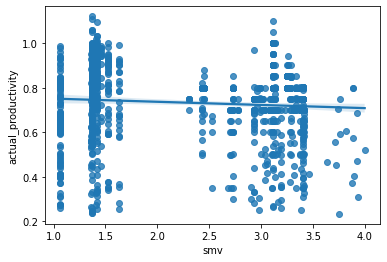

In [67]:
sns.regplot(x=new_smv, y=df3["actual_productivity"])

In [68]:
#Assigning values to new column

df3["smv_new"] = new_smv

#Dropping old smv column 
df3.drop(axis="columns", labels="smv" , inplace=True)

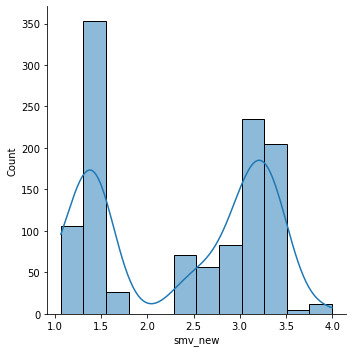

In [69]:
sns.displot(df3["smv_new"],kde=True )
plt.show()

#We observe bimodal distribution of smv_new values 

# 7. wip

In [70]:
#Work in progress. Includes the number of unfinished items for products

df3["wip"].value_counts()

0.0       485
1039.0      5
1282.0      4
1069.0      3
1413.0      3
         ... 
1745.0      1
1764.0      1
1584.0      1
1016.0      1
914.0       1
Name: wip, Length: 533, dtype: int64

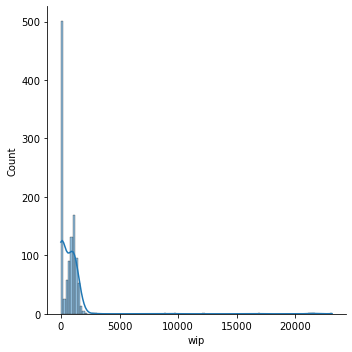

In [71]:
sns.displot(df3["wip"],kde=True )
plt.show()

<AxesSubplot:xlabel='wip', ylabel='actual_productivity'>

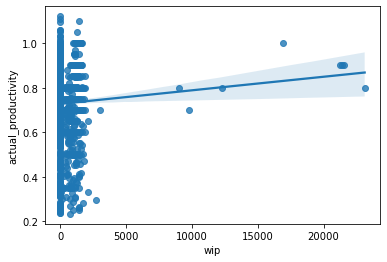

In [72]:
sns.regplot(x=df3["wip"], y=df3["actual_productivity"])

In [73]:
#Will perform log transformation on wip column to remove the skewness
wip_new = np.log(df3["wip"])

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='wip', ylabel='actual_productivity'>

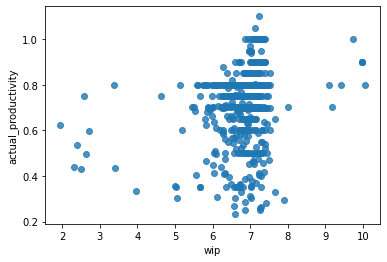

In [74]:
sns.regplot(x=wip_new, y=df3["actual_productivity"])

In [75]:
#Adding log transformed values of wip column into a new column in the dataframe
df3["wip_new"] = wip_new

#Drop the old wip column 
df3.drop(axis="columns", labels="wip" , inplace=True)

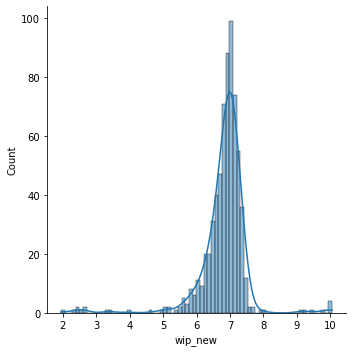

In [76]:
sns.displot(df3["wip_new"],kde=True )
plt.show()


In [77]:
df3.dtypes

over_time                int64
incentive                int64
idle_time              float64
idle_men                 int64
no_of_style_change       int64
no_of_workers          float64
actual_productivity    float64
target_prod            float64
smv_new                float64
wip_new                float64
dtype: object

# 8. over_time 

In [78]:
#Represents the amount of overtime by each team in minutes

<AxesSubplot:>

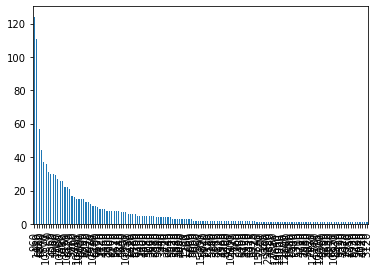

In [79]:
df3["over_time"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='over_time', ylabel='actual_productivity'>

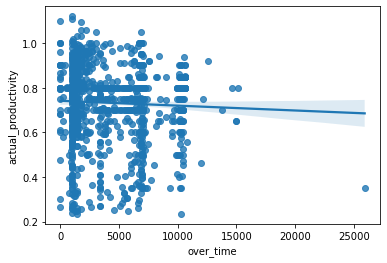

In [80]:
sns.regplot(x=df3["over_time"], y=df3["actual_productivity"])

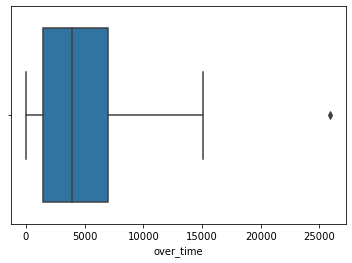

In [81]:
sns.boxplot(x=df3["over_time"])
plt.show()

In [82]:
#Log transformation
new_ov_data = np.log(df3["over_time"])

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [83]:
#Adding log transformed values into a new column 

df3["over_time_new"] = new_ov_data

#Dropping the old overtime column 
df3.drop(axis="columns", labels="over_time" , inplace=True)


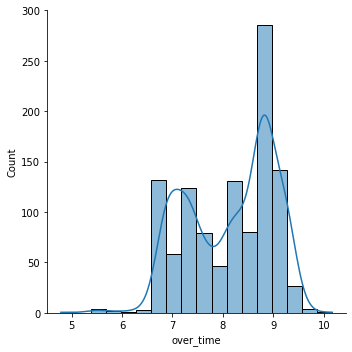

In [84]:
sns.displot(new_ov_data,kde=True )
plt.show()

#Overtime shows a bimodal distribution

<AxesSubplot:xlabel='over_time_new', ylabel='actual_productivity'>

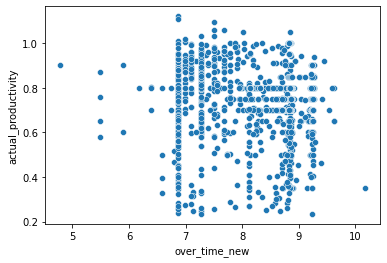

In [85]:
sns.scatterplot(x=df3["over_time_new"], y=df3["actual_productivity"])

# 9. Incentive

In [86]:
#Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

In [87]:
df3["incentive"].value_counts()

0       580
50      113
63       61
30       52
45       52
23       36
38       29
60       28
40       27
75       24
113      18
34       17
88       16
56       13
26        9
55        7
70        6
100       6
69        6
65        6
960       5
35        5
44        4
94        4
81        3
90        3
27        2
119       2
24        2
1080      1
1200      1
2880      1
3600      1
1440      1
32        1
62        1
98        1
49        1
33        1
138       1
46        1
29        1
21        1
37        1
54        1
25        1
Name: incentive, dtype: int64

<AxesSubplot:>

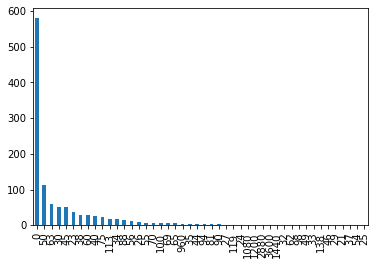

In [88]:
df3["incentive"].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='incentive', ylabel='actual_productivity'>

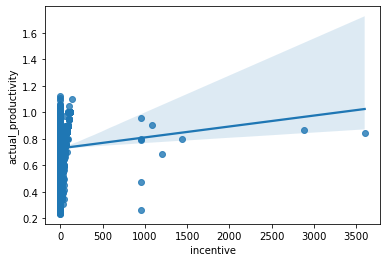

In [89]:
sns.regplot(x=df3["incentive"], y=df3["actual_productivity"])

#Incentive shows a positive correlation with actual_productivity

#Remove skewness

incentive_new = np.log(df3["incentive"])

In [90]:
print(df3['incentive'].skew())
print(df3['incentive'].quantile(0.10))
print(df3['incentive'].quantile(0.90))
df3["incentive"] = np.where(df3["incentive"] <0.0, 0.0,df3['incentive'])
df3["incentive"] = np.where(df3["incentive"] >1000, 1000,df3['incentive'])
print(df3['incentive'].skew())

15.551581208473763
0.0
63.0
9.043886710290664


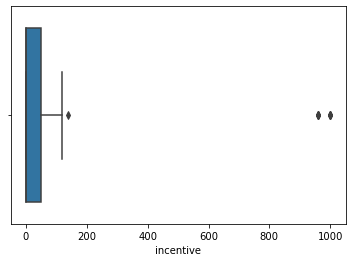

In [91]:
sns.boxplot(x=df3["incentive"])
plt.show()

<AxesSubplot:>

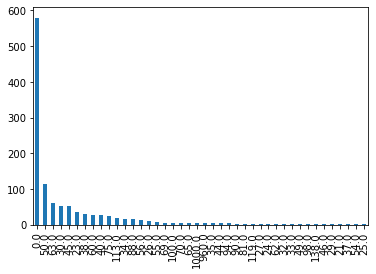

In [92]:
df3["incentive"].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='incentive', ylabel='actual_productivity'>

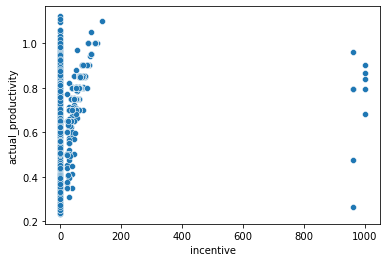

In [93]:
sns.scatterplot(x=df3["incentive"], y=df3["actual_productivity"])

In [94]:
#incentive_new

In [95]:
#sns.regplot(x=incentive_new, y=df3["actual_productivity"])


In [96]:
#incentive_new.value_counts().plot(kind = "bar")

In [97]:
#Adding the values into a new column

#df3["incentive_new"] = incentive_new

In [98]:
#Removing the old "incentive" column from the dataframe

#df3.drop(axis="columns", labels="incentive" , inplace=True)

# 10. idle_time

In [99]:
#The amount of time when the production was interrupted due to several reasons

In [100]:
df3["idle_time"].value_counts()

0.0      1135
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

<AxesSubplot:xlabel='idle_time', ylabel='actual_productivity'>

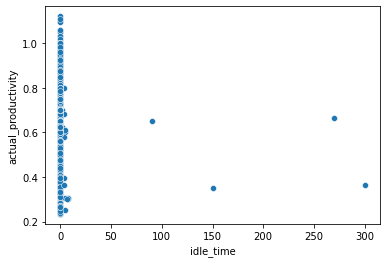

In [101]:
sns.scatterplot(x=df3["idle_time"], y=df3["actual_productivity"])

<AxesSubplot:xlabel='idle_time', ylabel='actual_productivity'>

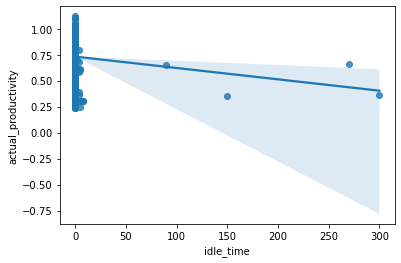

In [102]:
sns.regplot(x=df3["idle_time"], y=df3["actual_productivity"])

In [103]:
#No significant correlation and most of the values are 0, so can be dropped
df3.drop(axis="columns", labels="idle_time" , inplace=True)

# 11. idle_men

In [104]:
 #The number of workers who were idle due to production interruption 

In [105]:
df3["idle_men"].value_counts()

0     1135
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

<AxesSubplot:xlabel='idle_men', ylabel='actual_productivity'>

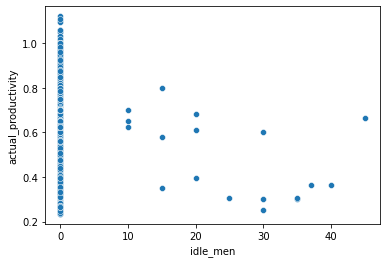

In [106]:
sns.scatterplot(x=df3["idle_men"], y=df3["actual_productivity"])

<AxesSubplot:xlabel='idle_men', ylabel='actual_productivity'>

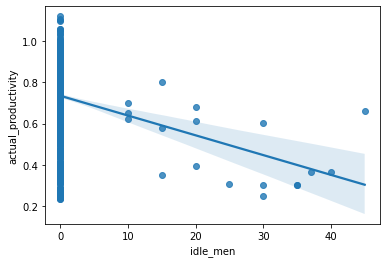

In [107]:
sns.regplot(x=df3["idle_men"], y=df3["actual_productivity"])

#Highly negative correlation with productivity and mostly values are 0 so can be removed 
#Also there is some multicollinearity between idle_time and idle_men which can make the prediction poor therefore we will discard it

In [108]:
#Dropping idle_men
df3.drop(axis="columns", labels="idle_men", inplace=True)

# 12. no_of_style_changes

In [109]:
#Number of changes in the style of a particular product

In [110]:
df3["no_of_style_change"].value_counts()

0    1006
1     114
2      33
Name: no_of_style_change, dtype: int64

<AxesSubplot:>

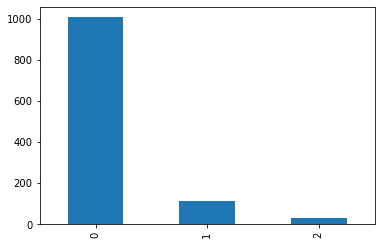

In [111]:
df3["no_of_style_change"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='no_of_style_change', ylabel='actual_productivity'>

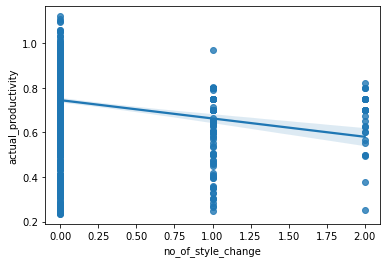

In [112]:
sns.regplot(x=df3["no_of_style_change"], y=df3["actual_productivity"])

<AxesSubplot:xlabel='no_of_style_change', ylabel='actual_productivity'>

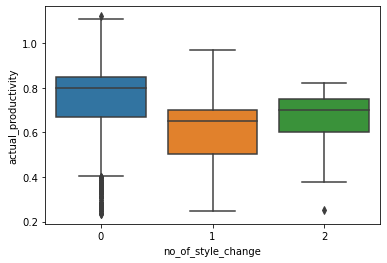

In [113]:
sns.boxplot(x="no_of_style_change", y = "actual_productivity", data=df3)

In [114]:
#log transformation to remove skewness
style_new = np.log(df3["no_of_style_change"])

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='no_of_style_change', ylabel='actual_productivity'>

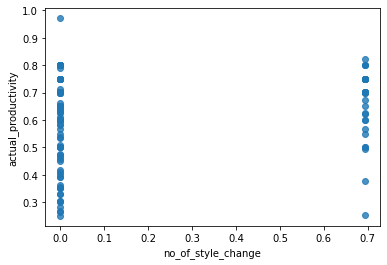

In [115]:
sns.regplot(x=style_new, y=df3["actual_productivity"])

<AxesSubplot:xlabel='no_of_style_change', ylabel='actual_productivity'>

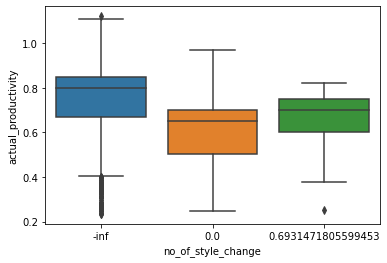

In [116]:
sns.boxplot(x=style_new, y = "actual_productivity", data=df3)

# 13. no_of_workers

In [117]:
#Number of workers in each team 

In [118]:
df3["no_of_workers"].value_counts()

8.0     257
58.0    110
57.0    105
59.0     73
56.5     54
       ... 
51.5      1
28.0      1
21.0      1
4.0       1
6.0       1
Name: no_of_workers, Length: 61, dtype: int64

<AxesSubplot:>

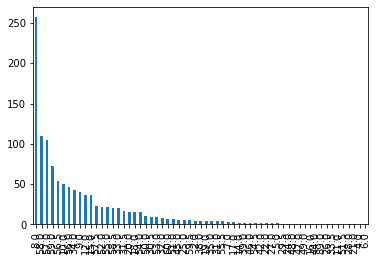

In [119]:
df3["no_of_workers"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='no_of_workers', ylabel='actual_productivity'>

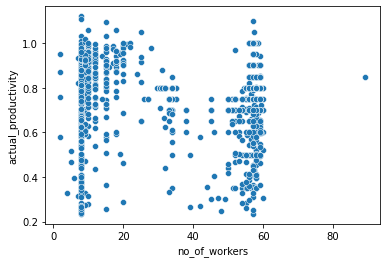

In [120]:
sns.scatterplot(x=df3["no_of_workers"], y=df3["actual_productivity"])

<AxesSubplot:xlabel='no_of_workers', ylabel='actual_productivity'>

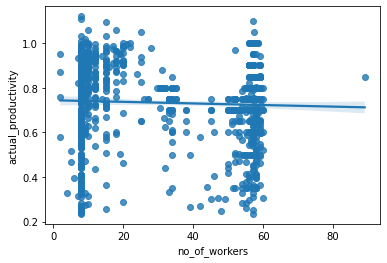

In [121]:
sns.regplot(x=df3["no_of_workers"], y=df3["actual_productivity"])

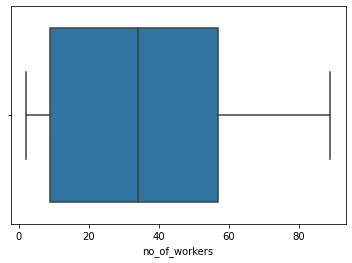

In [122]:
sns.boxplot(x=df3["no_of_workers"])
plt.show()

In [123]:
#Log transformation to overcome skewness

In [124]:
new_workers_data = np.log(df3["no_of_workers"])

<AxesSubplot:>

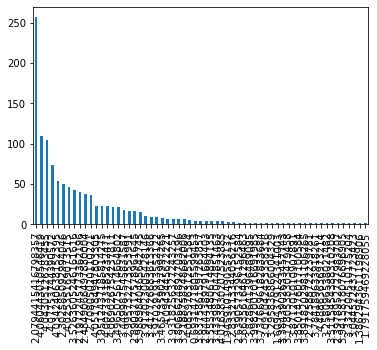

In [125]:
new_workers_data.value_counts().plot(kind = "bar")

In [126]:
#Putting log transformed values into new column
df3["Workers"] = new_workers_data

<AxesSubplot:>

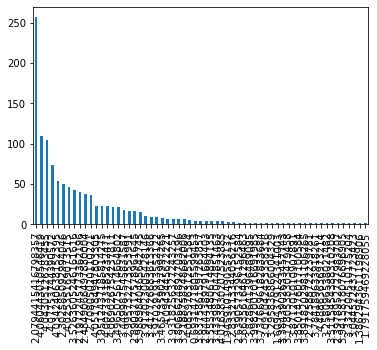

In [127]:
df3["Workers"].value_counts().plot(kind="bar")

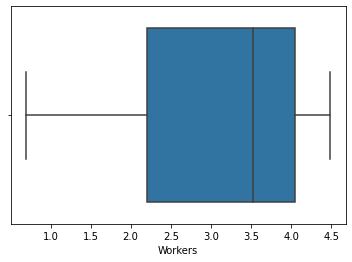

In [128]:
sns.boxplot(x=df3["Workers"])
plt.show()

<AxesSubplot:xlabel='Workers', ylabel='actual_productivity'>

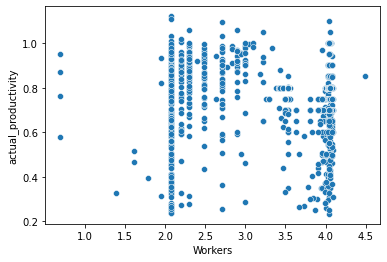

In [129]:
sns.scatterplot(x=df3["Workers"], y=df3["actual_productivity"])

<AxesSubplot:xlabel='Workers', ylabel='actual_productivity'>

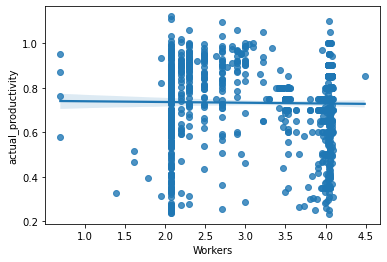

In [130]:
sns.regplot(x=df3["Workers"], y=df3["actual_productivity"])

#Line has become slighly better post log transformation

In [131]:
#Dropping old "no_of_workers data"

df3.drop(axis="columns", labels="no_of_workers" , inplace=True)

In [132]:
df3

,incentive,no_of_style_change,actual_productivity,target_prod,smv_new,wip_new,over_time_new,Workers
0,98.0,0,0.940725,0.80,3.264232,7.010312,8.865029,4.077537
1,0.0,0,0.886500,0.75,1.371181,-inf,6.866933,2.079442
2,50.0,0,0.800570,0.80,2.434490,6.875232,8.205218,3.417727
3,50.0,0,0.800570,0.80,2.434490,6.875232,8.205218,3.417727
4,50.0,0,0.800382,0.80,3.254243,7.064759,7.560080,4.025352
...,...,...,...,...,...,...,...,...
1192,0.0,0,0.628333,0.75,1.064711,-inf,6.866933,2.079442
1193,0.0,0,0.625625,0.70,1.360977,-inf,6.866933,2.079442
1194,0.0,0,0.625625,0.65,1.360977,-inf,6.866933,2.079442
1195,0.0,0,0.505889,0.75,1.064711,-inf,7.495542,2.708050


In [133]:
df3.corr()

,incentive,no_of_style_change,actual_productivity,target_prod,smv_new,wip_new,over_time_new,Workers
incentive,1.000000,-0.029988,0.104933,0.064643,0.111695,0.281103,0.591287,0.119379
no_of_style_change,-0.029988,1.000000,-0.206085,-0.246323,0.318220,-0.108099,0.140675,0.318244
actual_productivity,0.104933,-0.206085,1.000000,0.451354,-0.074292,0.241066,-0.019908,-0.016777
target_prod,0.064643,-0.246323,0.451354,1.000000,-0.090500,-0.012339,-0.073824,-0.089973
smv_new,0.111695,0.318220,-0.074292,-0.090500,1.000000,-0.034425,0.764265,0.944096
wip_new,0.281103,-0.108099,0.241066,-0.012339,-0.034425,1.000000,0.085083,-0.018191
over_time_new,0.591287,0.140675,-0.019908,-0.073824,0.764265,0.085083,1.000000,0.820884
Workers,0.119379,0.318244,-0.016777,-0.089973,0.944096,-0.018191,0.820884,1.000000


<AxesSubplot:>

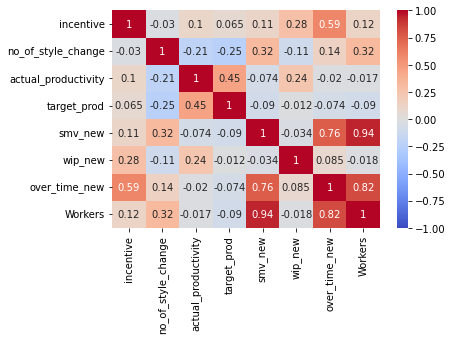

In [134]:
sns.heatmap(df3.corr(), vmin=-1, cmap="coolwarm", annot=True)

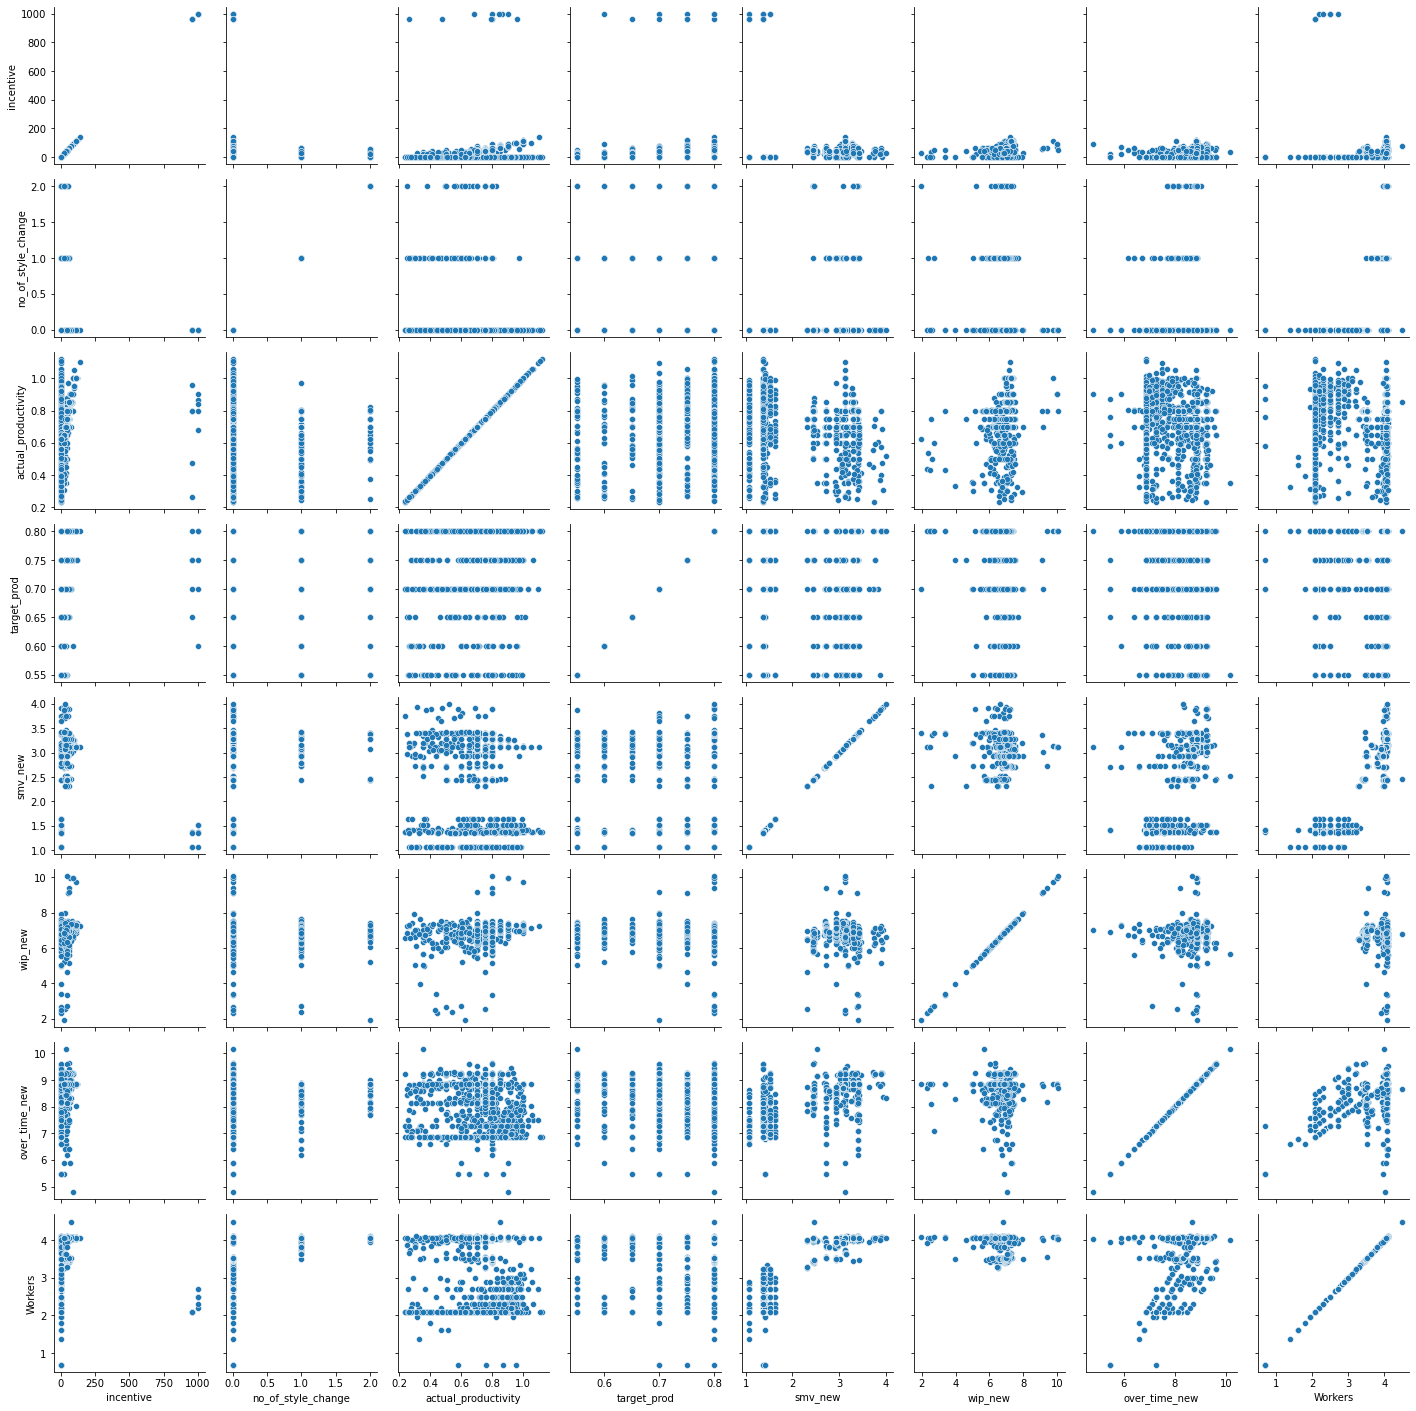

In [135]:
g1 = sns.PairGrid(df3)
g1.map(sns.scatterplot)

In [136]:
#Wrt to actual_productivity: target_prod, wip_new, incentive_new show positive correlation 
#Also "Workers" show slighly negative correlation so we can keep that

In [137]:
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.041455,-0.111845,-0.010993,-0.096266,-0.005787,0.003876,0.027530,-0.011427,-0.074036,-0.147505
targeted_productivity,0.041455,1.000000,-0.071398,0.018603,-0.093889,0.030376,-0.057327,-0.055189,-0.214681,-0.089276,0.424488
smv,-0.111845,-0.071398,1.000000,0.318031,0.668836,0.026461,0.057713,0.107482,0.320720,0.912059,-0.111627
wip,-0.010993,0.018603,0.318031,1.000000,0.269259,0.034880,-0.005218,-0.007341,0.052979,0.367795,0.053969
over_time,-0.096266,-0.093889,0.668836,0.269259,1.000000,-0.011521,0.030897,-0.019258,0.057307,0.726550,-0.042309
incentive,-0.005787,0.030376,0.026461,0.034880,-0.011521,1.000000,-0.012108,-0.021306,-0.027126,0.041965,0.077529
idle_time,0.003876,-0.057327,0.057713,-0.005218,0.030897,-0.012108,1.000000,0.559070,-0.012399,0.058952,-0.081795
idle_men,0.027530,-0.055189,0.107482,-0.007341,-0.019258,-0.021306,0.559070,1.000000,0.132460,0.108591,-0.184221
no_of_style_change,-0.011427,-0.214681,0.320720,0.052979,0.057307,-0.027126,-0.012399,0.132460,1.000000,0.333508,-0.206085
no_of_workers,-0.074036,-0.089276,0.912059,0.367795,0.726550,0.041965,0.058952,0.108591,0.333508,1.000000,-0.045641


# Multivariate analysis

In [138]:
df_c = df3[[
 'incentive',
 'target_prod',"actual_productivity"]]

In [139]:
df_c

,incentive,target_prod,actual_productivity
0,98.0,0.80,0.940725
1,0.0,0.75,0.886500
2,50.0,0.80,0.800570
3,50.0,0.80,0.800570
4,50.0,0.80,0.800382
...,...,...,...
1192,0.0,0.75,0.628333
1193,0.0,0.70,0.625625
1194,0.0,0.65,0.625625
1195,0.0,0.75,0.505889


<AxesSubplot:>

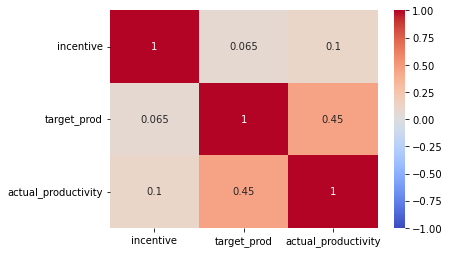

In [140]:
sns.heatmap(df_c.corr(), vmin=-1, cmap="coolwarm", annot=True)

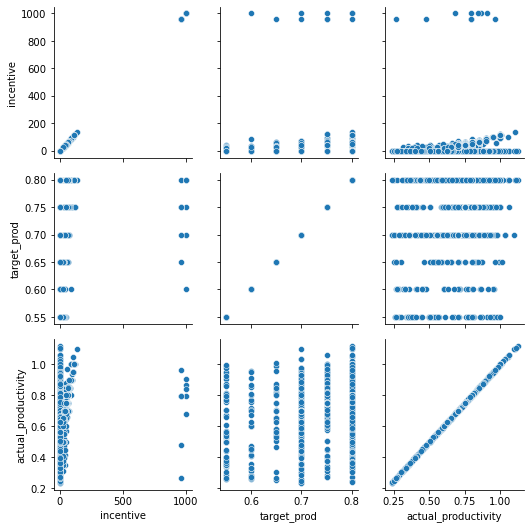

In [141]:
g2 = sns.PairGrid(df_c)
g2.map(sns.scatterplot)

In [302]:
#Normalizing all values
df_c1 = (df_c - df_c.mean())//df_c.std()

In [303]:
df_c1

,incentive,target_prod,actual_productivity
0,0.0,0.0,1.0
1,-1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1192,-1.0,0.0,-1.0
1193,-1.0,-1.0,-1.0
1194,-1.0,-2.0,-1.0
1195,-1.0,0.0,-2.0


In [304]:
df_c1.isna().sum()

incentive              0
target_prod            0
actual_productivity    0
dtype: int64

In [305]:
#Post normalization all wip values have become Nan, so we can remove that column 

#df_c1.drop(axis="columns", labels="wip_new" , inplace=True)

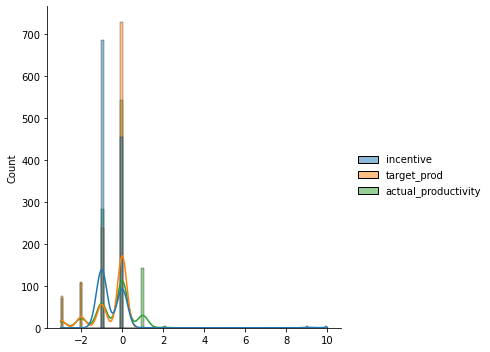

In [306]:
sns.displot(df_c1,kde=True )
plt.show()

In [307]:
#Extracting independent and dependent features 
#Here depending feature is actual_productivity
x = df_c1.iloc[:,:-1]  #Independent features
y = df_c1.iloc[:,-1] #Dependent feature

In [308]:
#Train and test data split

In [309]:
x.shape[0]

1153

In [310]:
n = int((1 - 0.2) * x.shape[0]) + 1  #int as the answer will be float 

In [311]:
n

923

In [312]:
x_train, x_test = np.split(x, [n])

In [313]:
x_train

,incentive,target_prod
0,0.0,0.0
1,-1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
962,-1.0,0.0
963,-1.0,0.0
964,-1.0,0.0
965,-1.0,0.0


In [314]:
x_test

,incentive,target_prod
967,0.0,0.0
968,0.0,0.0
969,-1.0,-3.0
970,0.0,0.0
971,0.0,0.0
...,...,...
1192,-1.0,0.0
1193,-1.0,-1.0
1194,-1.0,-2.0
1195,-1.0,0.0


In [315]:
 y_train, y_test = np.split(y, [n])

In [316]:
y_train

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
962   -3.0
963   -3.0
964    1.0
965    1.0
966    0.0
Name: actual_productivity, Length: 923, dtype: float64

In [317]:
y_test

967     0.0
968     0.0
969     0.0
970     0.0
971     0.0
       ... 
1192   -1.0
1193   -1.0
1194   -1.0
1195   -2.0
1196   -2.0
Name: actual_productivity, Length: 230, dtype: float64

In [318]:
#Training data 


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mlr = LinearRegression()
mlr.fit(x_train,y_train)
mlr_preds = mlr.predict(x_train)

print(mlr.intercept_)
print(mlr.coef_)
print("rmse:",np.sqrt(mean_squared_error(y_train,mlr_preds)))
print("R^2",r2_score(y_train,mlr_preds))



0.03360540713742605
[0.39354357 0.46544516]
rmse: 0.9242168774369978
R^2 0.2342116703047905


In [319]:
# Test data 

In [320]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mlr1 = LinearRegression()
mlr1.fit(x_test,y_test)
mlr1_preds = mlr1.predict(x_test)

print(mlr1.intercept_)
print(mlr1.coef_)
print("rmse:",np.sqrt(mean_squared_error(y_test,mlr1_preds)))
print("R^2",r2_score(y_test,mlr1_preds))



-0.27599574193148907
[0.02860275 0.42544949]
rmse: 0.868523892542209
R^2 0.18135041284277298


In [321]:
#Multivariate Linear Regression without using library

In [322]:
x_train

,incentive,target_prod
0,0.0,0.0
1,-1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
962,-1.0,0.0
963,-1.0,0.0
964,-1.0,0.0
965,-1.0,0.0


In [323]:
y_train

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
962   -3.0
963   -3.0
964    1.0
965    1.0
966    0.0
Name: actual_productivity, Length: 923, dtype: float64

In [324]:
#Modelling wrt train dataset

In [325]:
#Adding column of ones as the bias term(Wo)

In [326]:
(x_train.shape[0], 1)

(923, 1)

In [327]:
x_train = np.concatenate((np.ones((x_train.shape[0],1)),x_train),axis=1)

In [328]:
x_train

array([[ 1.,  0.,  0.],
       [ 1., -1.,  0.],
       [ 1.,  0.,  0.],
       ...,
       [ 1., -1.,  0.],
       [ 1., -1.,  0.],
       [ 1.,  0.,  0.]])

In [329]:
x_train = pd.DataFrame(x_train, columns= ["W0", "incentive", "target_prod"])

In [330]:
x_train

,W0,incentive,target_prod
0,1.0,0.0,0.0
1,1.0,-1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
918,1.0,-1.0,0.0
919,1.0,-1.0,0.0
920,1.0,-1.0,0.0
921,1.0,-1.0,0.0


In [331]:
y_train

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
962   -3.0
963   -3.0
964    1.0
965    1.0
966    0.0
Name: actual_productivity, Length: 923, dtype: float64

In [332]:
#Initiating w1 value = 1

In [333]:
w1 = np.array([1]*len(x_train.columns))     #x_train.columns = 3

In [334]:
w1

array([1, 1, 1])

In [335]:
# m = No of training examples

In [336]:
m = len(x_train)

In [337]:
m

923

In [338]:
#Defining the main function

#Equation-1 (y ~ w1x)
#def main_func(x,w1):
    #return w1.T*x
    

In [339]:
#Defining Loss function 

def Loss_func(x_train, y_train, w1):
    m = y_train.size
    y1 = np.dot(x_train, w1.T)   #Dot product of x and transposed w1   (y ~ w.T) #Predicted y1
    e = y1 - y_train             #Calculating error between each predicted and actual value (e = w.T - yi).
    mse = 1/(2*m) * np.dot(e.T, e)   #Cost function formula  (J(w) = 1/n x (w.T -yi).T) x (w.T -yi))
    return mse, e   #Returning Cost function/mse

In [340]:
loss = Loss_func(x_train, y_train, w1)

In [341]:
loss

(0.676056338028169,
 0      0.0
 1      0.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 962    3.0
 963    3.0
 964   -1.0
 965   -1.0
 966    1.0
 Name: actual_productivity, Length: 923, dtype: float64)

In [342]:
#Gradient descent

n = 923
J_0_vec = np.zeros(10000) #Defining an array of zeros = no.of iterations
learn_rate = 0.05
j = []
for i in range(10000):            #10000 iterations
    mse, e = Loss_func(x_train, y_train, w1)
    w1 = w1 - (learn_rate*(1/n)*np.dot(x_train.T, e))
    J_0_vec[i] = mse
    j.append(mse)
    i = i + 1
print(w1)
print(J_0_vec)

[0.03360541 0.39354357 0.46544516]
[0.67605634 0.66569602 0.65585009 ... 0.42708842 0.42708842 0.42708842]


In [343]:
w1

array([0.03360541, 0.39354357, 0.46544516])

In [344]:
rmse = np.sqrt(J_0_vec)

In [345]:
rmse

array([0.82222645, 0.81590197, 0.80984572, ..., 0.65352002, 0.65352002,
       0.65352002])

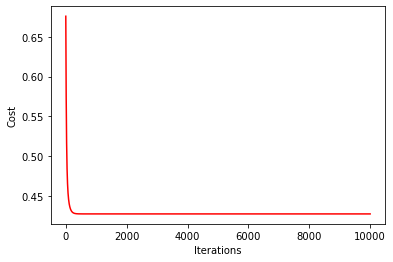

In [346]:
fig, ax = plt.subplots()
ax.plot(np.arange(10000), J_0_vec, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
plt.show()

In [347]:
# For test data 

In [348]:
x_test

,incentive,target_prod
967,0.0,0.0
968,0.0,0.0
969,-1.0,-3.0
970,0.0,0.0
971,0.0,0.0
...,...,...
1192,-1.0,0.0
1193,-1.0,-1.0
1194,-1.0,-2.0
1195,-1.0,0.0


In [349]:
#Adding column of ones as the bias term(Wo)

In [350]:
x_test = np.concatenate((np.ones((x_test.shape[0],1)),x_test),axis=1)

In [351]:
x_test = pd.DataFrame(x_test, columns= ["W0", "incentive", "target_prod"])

In [352]:
x_test

,W0,incentive,target_prod
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,-1.0,-3.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
225,1.0,-1.0,0.0
226,1.0,-1.0,-1.0
227,1.0,-1.0,-2.0
228,1.0,-1.0,0.0


In [353]:
#Initializing w1 value

w1_test = np.array([1]*len(x_test.columns))     #x_train.columns = 3

In [354]:
w1_test

array([1, 1, 1])

In [355]:
m1 = len(x_test)

In [356]:
m1   #no. of test examples 

230

In [357]:
#Defining Loss function 

def Loss_func1(x_test, y_test, w1_test):
    m1 = y_test.size
    y1_test = np.dot(x_test, w1_test.T)   #Dot product of x and transposed w1   (y ~ w.T) #Predicted y1
    e1 = y1_test - y_test             #Calculating error between each predicted and actual value (e = w.T - yi).
    mse1 = 1/(2*m) * np.dot(e1.T, e1)   #Cost function formula  (J(w) = 1/n x (w.T -yi).T) x (w.T -yi))
    return mse1, e1   #Returning Cost function/mse

In [358]:
Loss_func1(x_test, y_test, w1_test)

(0.7464788732394366,
 967     1.0
 968     1.0
 969    -3.0
 970     1.0
 971     1.0
        ... 
 1192    1.0
 1193    0.0
 1194   -1.0
 1195    2.0
 1196    1.0
 Name: actual_productivity, Length: 230, dtype: float64)

In [359]:
#Gradient descent

n = 230
J_0_vec1 = np.zeros(10000) #Defining an array of zeros = no.of iterations
learn_rate = 0.05
j1 = []
for i in range(10000):            #10000 iterations
    mse1, e1 = Loss_func1(x_test, y_test, w1_test)
    w1_test = w1_test - (learn_rate*(1/n)*np.dot(x_test.T, e1))
    J_0_vec1[i] = mse1
    j1.append(mse1)
    i = i + 1
print(w1_test)
print(J_0_vec1)

[-0.27599574  0.02860275  0.42544949]
[0.74647887 0.53016647 0.39788626 ... 0.09398525 0.09398525 0.09398525]


In [360]:
rmse2 = np.sqrt(J_0_vec1)

In [361]:
rmse2

array([0.86399009, 0.72812531, 0.63078226, ..., 0.30657013, 0.30657013,
       0.30657013])

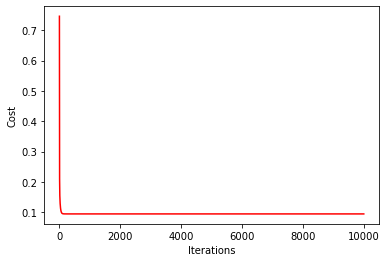

In [362]:
fig, ax = plt.subplots()
ax.plot(np.arange(10000), J_0_vec1, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
plt.show()

# Univariate Analysis

In [363]:
df_c1

,incentive,target_prod,actual_productivity
0,0.0,0.0,1.0
1,-1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1192,-1.0,0.0,-1.0
1193,-1.0,-1.0,-1.0
1194,-1.0,-2.0,-1.0
1195,-1.0,0.0,-2.0


In [364]:
x = df_c1[["target_prod"]]
x

,target_prod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1192,0.0
1193,-1.0
1194,-2.0
1195,0.0


In [365]:
y = df_c1.actual_productivity
y

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1192   -1.0
1193   -1.0
1194   -1.0
1195   -2.0
1196   -2.0
Name: actual_productivity, Length: 1153, dtype: float64

In [366]:
#Using library

In [367]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [368]:
linear.fit(x,y)
print(linear.intercept_)
print(linear.coef_)
print(linear.score)

-0.18470956574861297
[0.50953266]
<bound method RegressorMixin.score of LinearRegression()>


In [369]:
#Without using library

In [370]:
x = x.to_numpy()
y = y.to_numpy()

In [371]:
x

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [-2.],
       [ 0.],
       [-1.]])

In [372]:
y

array([ 1.,  0.,  0., ..., -1., -2., -2.])

In [373]:
n = int((1 - 0.2) * x.shape[0]) + 1

In [374]:
n

923

In [375]:
x_train, x_test = np.split(x, [n])

In [376]:
y_train, y_test,   = np.split(y, [n])

In [377]:
linear.fit(x_test,y_test)
print(linear.intercept_)
print(linear.coef_)
print(linear.score)

-0.2764722384065946
[0.43197169]
<bound method RegressorMixin.score of LinearRegression()>


In [378]:
linear.fit(x_train,y_train)
print(linear.intercept_)
print(linear.coef_)
print(linear.score)

-0.1646525679758309
[0.52878483]
<bound method RegressorMixin.score of LinearRegression()>


In [379]:
x_train.size

923

In [380]:
y_train.size

923

In [381]:
x_test.size

230

In [382]:
y_test.size

230

# Closed Form

In [383]:
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),1)
y_test = y_test.reshape(len(y_test),1)

In [384]:
#Finding slope and intercept using training data 

In [385]:
x_train = np.append(x_train, np.ones((x_train.size,1)), axis=1)

In [386]:
x_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [387]:
w_x = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), np.dot(x_train.T, y_train))

In [388]:
w_x

array([[ 0.52878483],
       [-0.16465257]])

In [389]:
#Finding slope and intercept using test data

In [390]:
x_test = np.append(x_test, np.ones((x_test.size,1)), axis=1)

In [391]:
x_test

array([[ 0.,  1.],
       [ 0.,  1.],
       [-3.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [-1.,  1.],
       [-3.,  1.],
       [-3.,  1.],
       [-3.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [-1.,  1.],
       [-2.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [-1.,  1.],
       [-2.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [-2.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [-2.,

In [392]:
w_y = np.dot(np.linalg.inv(np.dot(x_test.T, x_test)), np.dot(x_test.T, y_test))

In [393]:
w_y

array([[ 0.43197169],
       [-0.27647224]])

In [394]:
#Train data Prediction 

In [395]:
train_prediction = np.dot(x_train, w_x)

In [396]:
train_prediction

array([[-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.6934374 ],
       [-0.16465257],
       [-0.16465257],
       [-1.22222222],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-1.22222222],
       [-0.6934374 ],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.6934374 ],
       [-0.6934374 ],
       [-0.6934374 ],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0.16465257],
       [-0

In [397]:
train_error = np.mean(np.square(np.array(train_prediction)-np.array(y_train)))

In [398]:
train_error

0.88858502838759

In [399]:
#Test data Prediction

In [400]:
test_prediction = np.dot(x_test, w_x)

In [401]:
test_error = np.mean(np.square(np.array(test_prediction)-np.array(y_test)))

In [402]:
test_error

0.768051009862015

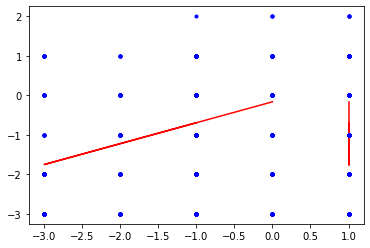

In [403]:
plt.plot(x_test, test_prediction, "r-")
plt.plot(x_train, y_train, "b.")

In [404]:
# Finding RMSE values 

In [405]:
#Train data

mse = 0
for i in range (0,len(y_train)):
    diff = (y_train[i] - train_prediction[i])**2 
    mse = mse + diff 
mse = mse/n  
print(mse**1/2)   #Root mean square error 

[0.44429251]


In [406]:
#Test data

mse1 = 0
for i in range (0,len(y_test)):
    diff = (y_test[i] - test_prediction[i])**2 
    mse1 = mse1 + diff 
mse1 = mse1/n  
print(mse1**1/2)

[0.09569433]


# Gradient descent

In [407]:
#Training data

In [408]:
#x is a Matrice of 1's and the target_prod Column
# m*2 matrix
x_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [409]:
x_train.shape

(923, 2)

In [410]:
# y is the data set of the actual probabilities. It is also m*1 Matrice 

In [411]:
y_train

array([[ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-2.],
       [-2.],
       [-2.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-3.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [412]:
y_train.shape

(923, 1)

In [413]:
##theta is a 2*1 Matrice

theta = np.zeros((2,1))

In [414]:
theta

array([[0.],
       [0.]])

In [415]:
theta.shape

(2, 1)

In [416]:
def cost_func(X,y,theta):
    m = len(y) 
    y_pred = X.dot(theta)
    sq_error = (y_pred - y) ** 2
    return 1/(m * 2) * np.sum(sq_error)


In [417]:
cost_func(x_train, y_train, theta)

0.6652221018418201

In [418]:
def gd(X,y,theta,alpha,iterations):
    m = len(y)
    costs = []

    for i in range(0,iterations):
        y_pred = X.dot(theta)  #Prediction wrt theta
        error = np.dot(X.transpose(),(y_pred - y))
        theta -= alpha * error * (1/m)  #Changing theta to achive optimal cost
        costs.append(cost_func(X,y,theta))        
    return theta,costs


In [419]:
t, c = gd(x_train, y_train,theta, alpha = 0.05, iterations = 1000)

In [420]:
t

array([[ 0.52878483],
       [-0.16465257]])

In [421]:
def converg_graph(costs, iterations):

    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('Costs')
    plt.show()

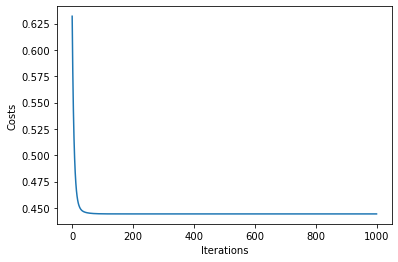

In [422]:
converg_graph(c, 1000)

In [423]:
#Test data

In [424]:
x_test

array([[ 0.,  1.],
       [ 0.,  1.],
       [-3.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [-1.,  1.],
       [-3.,  1.],
       [-3.,  1.],
       [-3.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [-1.,  1.],
       [-2.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [-1.,  1.],
       [-2.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [-2.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [-2.,  1.],
       [-2.,

In [425]:
y_test

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-3.],
       [-3.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-2.],
       [-2.],
       [-3.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-2.],
       [-3.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
      

In [426]:
theta1 = np.zeros((2,1))

In [427]:
theta1

array([[0.],
       [0.]])

In [428]:
cost_func(x_test, y_test, theta1)

0.6304347826086957

In [429]:
t1, c1 = gd(x_test, y_test,theta, alpha = 0.05, iterations = 1000)

In [430]:
t1

array([[ 0.43197169],
       [-0.27647224]])

In [431]:
c1

[0.3837885848003247,
 0.38356415766261287,
 0.38335132747755546,
 0.3831492995681349,
 0.3829573648899914,
 0.3827748870529074,
 0.38260129159628764,
 0.3824360571115692,
 0.3822787078787562,
 0.38212880774494323,
 0.381985955022281,
 0.38184977822334587,
 0.3817199324849962,
 0.3815960965588481,
 0.38147797026863056,
 0.3813652723527485,
 0.3812577386251635,
 0.381155120399782,
 0.38105718313341286,
 0.38096370525044015,
 0.3808744771189495,
 0.38078930015346335,
 0.3807079860238432,
 0.38063035595354977,
 0.38055624009339856,
 0.3804854769593807,
 0.38041791292509947,
 0.3803534017610019,
 0.380291804213918,
 0.38023298762151053,
 0.3801768255571446,
 0.38012319750141316,
 0.38007198853716945,
 0.38002308906541266,
 0.3799763945397848,
 0.37993180521777636,
 0.37988922592702,
 0.3798485658452806,
 0.3798097382929458,
 0.37977266053697933,
 0.37973725360543464,
 0.3797034421117351,
 0.379671154088023,
 0.3796403208269588,
 0.3796108767314159,
 0.37958275917157447,
 0.3795559083489678,

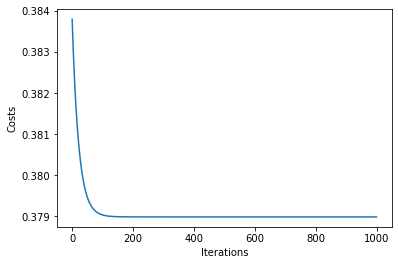

In [432]:
converg_graph(c1, 1000)